<a href="https://colab.research.google.com/github/anizmo/DisplayOnly/blob/main/DMT_Assignment_9_potdar_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9 - Model Evaluation

In [1]:
# Importing all the necessary dependencies
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import load_boston
import graphviz
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the Boston Housing Dataset from sklearn
data = load_boston()
feature_names = data.feature_names
X = data.data
y = data.target

In [3]:
feature_names = data.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Split the range of target values into 2 equal parts - low, and high. Reassign the target values into into three categorical values 0, and 1 representing low, and high range of values, respectively.

In [4]:
segmented_data = np.empty(len(y), dtype=int)
df = pd.DataFrame(y).describe()
df

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [5]:
segmented_data = np.empty(len(y), dtype=int)
df = pd.DataFrame(y).describe()
# Getting the 50 Percentile Value from the Describe DataFrame
fiftyQuantile = df.values[5]

position = 0

# Looping through the target values and setting binary classification
# Anything below 50 Percentile is classified as low and above that is classified as high.
for target_values in y:
  if (target_values <= fiftyQuantile):
    segmented_data[position] = 0
    position+=1
  else:
    segmented_data[position] = 1
    position+=1

segmented_data

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

## Split the dataset into training and test sets (80, 20).

In [6]:
colx_train, colx_test, coly_train, coly_test = train_test_split(X, 
                                                                np.array(segmented_data), 
                                                                test_size =0.2)
  
print("colx_train shape : ", colx_train.shape)
print("colx_test shape  : ", colx_test.shape)
print("coly_train shape : ", coly_train.shape)
print("coly_test shape  : ", coly_test.shape)

colx_train shape :  (404, 13)
colx_test shape  :  (102, 13)
coly_train shape :  (404,)
coly_test shape  :  (102,)


### Train a supervised learning model that can be used to generate predictions for your data.

In [7]:
# Fitting the Decision Tree
decTreeClf = tree.DecisionTreeClassifier()
decTreeClf = decTreeClf.fit(colx_train, coly_train)

### Similarly as in previous step, train another Decision Tree Classifier - but in this case set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and test set as you used for the Decision Tree in the previous step.

In [8]:
# Fitting the Decision Tree
oneDepthDecTreeClf = tree.DecisionTreeClassifier(max_depth=1)
oneDepthDecTreeClf = oneDepthDecTreeClf.fit(colx_train, coly_train)

### Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

In [9]:
def describe_tree(classifier):
  # Reporting the parameters
  print("Max Tree Depth: ", classifier.tree_.max_depth)
  print("Number of leaves: ", classifier.tree_.n_leaves)
  print("Feature Importance: ", classifier.tree_.compute_feature_importances())
  print("Tree Depth: ", classifier.get_depth())
  print("Train Score: ", classifier.score(colx_train, coly_train))
  print("Test Score: ", classifier.score(colx_test, coly_test))

In [11]:
describe_tree(decTreeClf)

Max Tree Depth:  11
Number of leaves:  48
Feature Importance:  [0.0212017  0.         0.01757113 0.01526222 0.02302153 0.14334423
 0.08900096 0.0740365  0.         0.01071641 0.02291142 0.02347683
 0.55945707]
Tree Depth:  11
Train Score:  1.0
Test Score:  0.8431372549019608


In [12]:
describe_tree(oneDepthDecTreeClf)

Max Tree Depth:  1
Number of leaves:  2
Feature Importance:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Tree Depth:  1
Train Score:  0.8366336633663366
Test Score:  0.8137254901960784


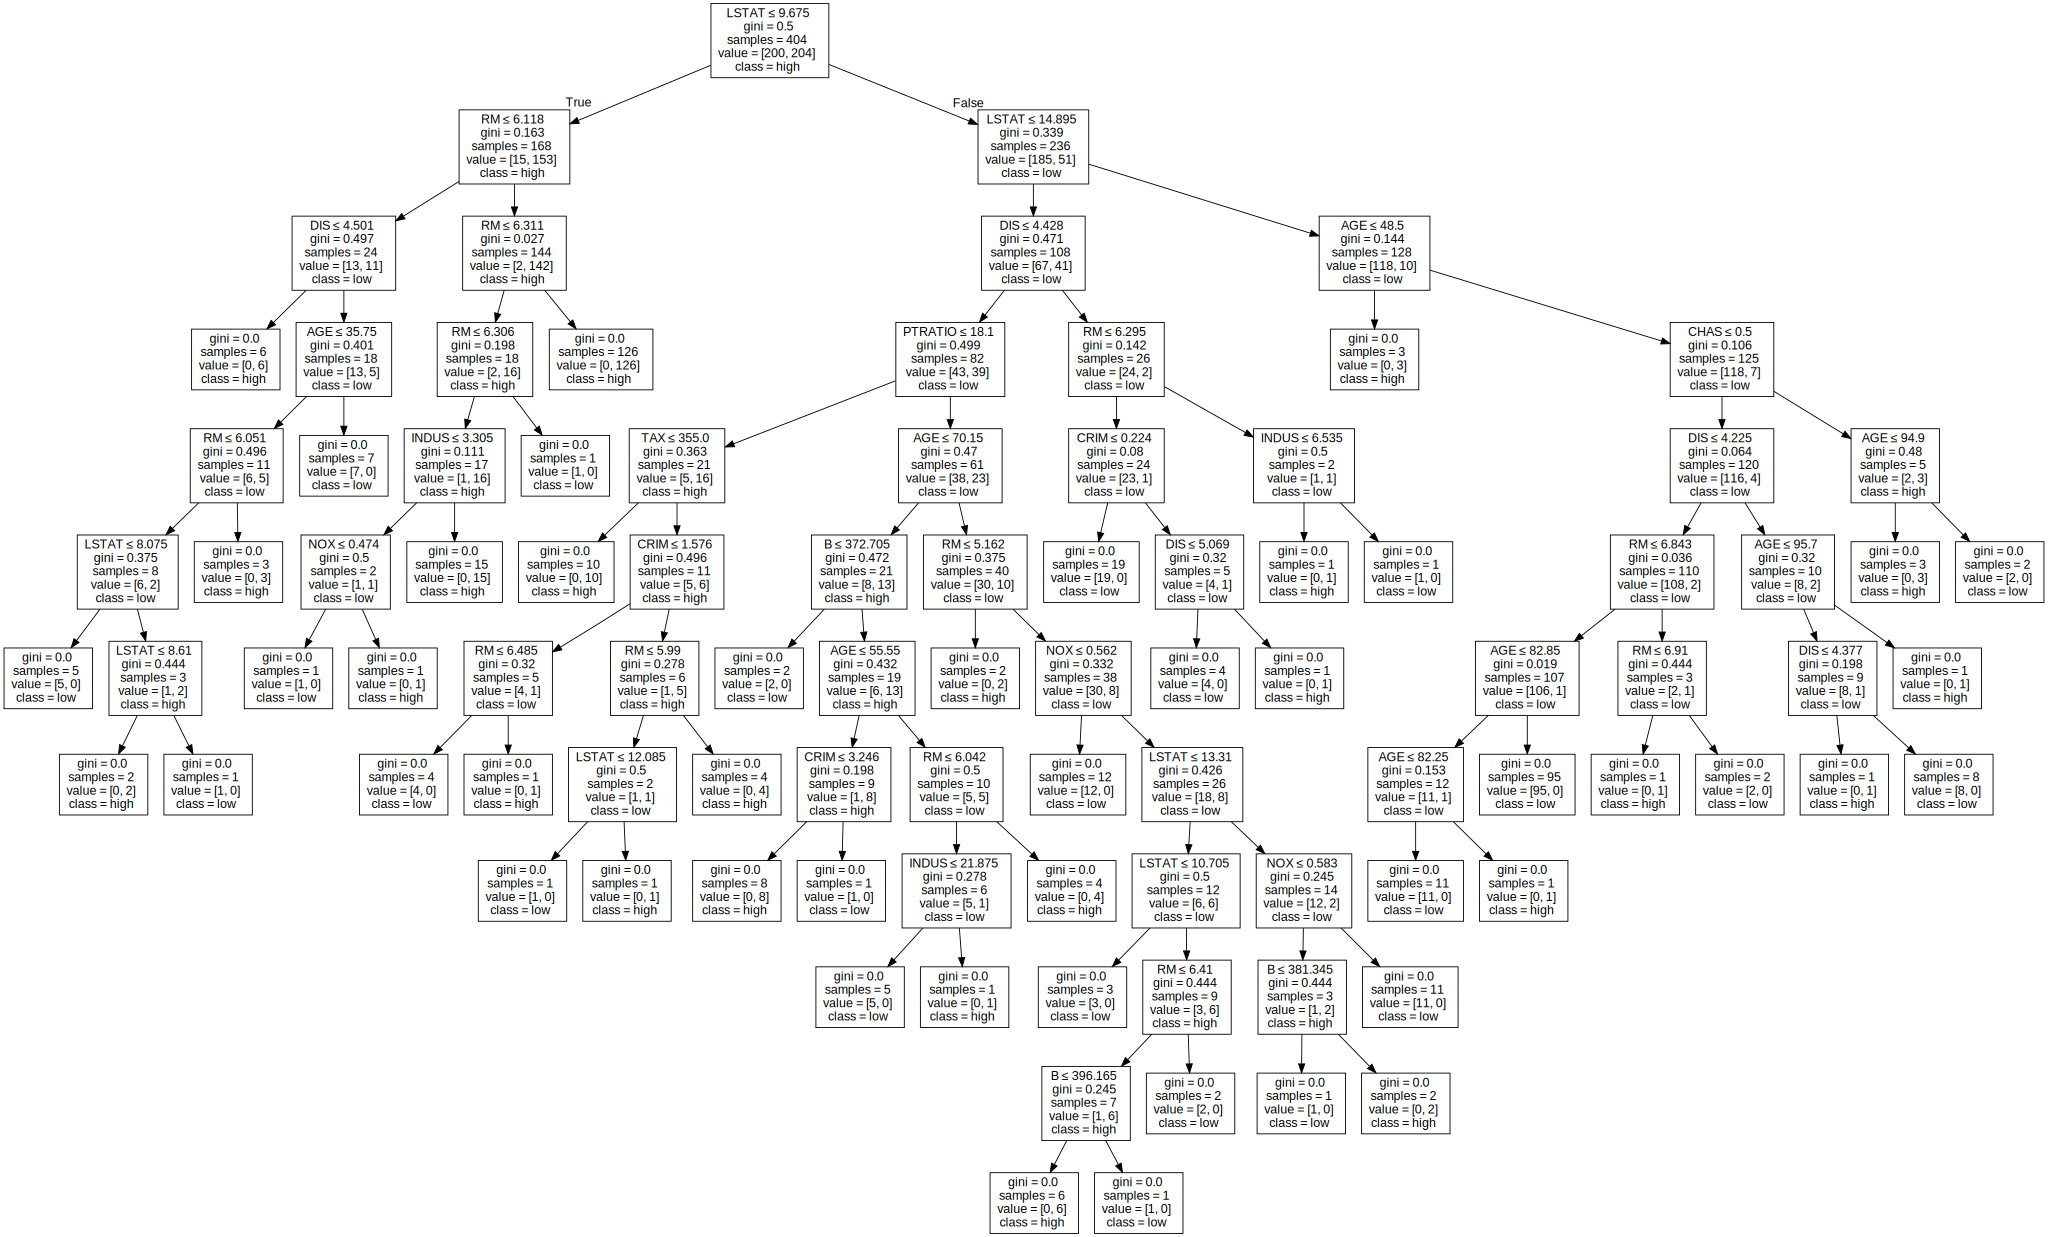

In [13]:
dot_data = tree.export_graphviz(decTreeClf,
                                  out_file=None,
                                  feature_names = feature_names,
                                  class_names=['low','high'],
                                  special_characters=True)  

graph = graphviz.Source(dot_data)
graph

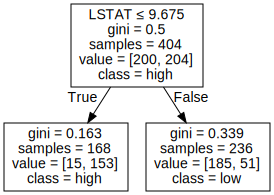

In [14]:
dot_data = tree.export_graphviz(oneDepthDecTreeClf,
                                  out_file=None,
                                  feature_names = feature_names,
                                  class_names=['low','high'],
                                  special_characters=True)  

graph = graphviz.Source(dot_data)
graph

### Report on the six evaluation metrics listed in objective for both the models, and compare their results.

In [15]:
def generate_evaluation_metrics(classifier):
  print("Metrics for Decision Tree Depth: ", classifier.get_depth())
  print()
  y_pred = classifier.predict(colx_test)
  accuracy_decision_tree = accuracy_score(coly_test, y_pred)

  #1. The accuracy of your model on the test data
  print("Accuracy: ", accuracy_decision_tree)
  print()

  #2. The precision and recall values
  print("Precision and Recall Values")
  print("Average : Macro - ", precision_recall_fscore_support(coly_test, y_pred, average="macro"))
  print("Average : Micro - ", precision_recall_fscore_support(coly_test, y_pred, average="micro"))
  print("Average : Weighted - ", precision_recall_fscore_support(coly_test, y_pred, average="weighted"))

  print()

  #3. A classification report
  print("Classificatio Report")
  target_names = ['Low', 'High']
  print(classification_report(coly_test, y_pred, target_names=target_names))
  print()

  #4. The confusion matrix for this experiment
  print("Confusion Matrix")
  print(confusion_matrix(coly_test, y_pred))
  print()

  #5. An ROC curve
  fpr, tpr, thresh = roc_curve(coly_test, y_pred)
  skf_auc = roc_auc_score(coly_test, y_pred)
  plt.plot(fpr, tpr, linewidth=2.5, label = "ROC")
  plt.title("ROC Curve", fontsize=15);

  print()

  #6. A Precision/Recall curve
  display = PrecisionRecallDisplay.from_estimator(classifier, colx_test, coly_test)
  precision_recall_curve = display.ax_.set_title("Precision-Recall curve")

Metrics for Decision Tree Depth:  11

Accuracy:  0.8431372549019608

Precision and Recall Values
Average : Macro -  (0.8442307692307692, 0.8474378881987578, 0.8428956488255679, None)
Average : Micro -  (0.8431372549019608, 0.8431372549019608, 0.8431372549019607, None)
Average : Weighted -  (0.8496983408748114, 0.8431372549019608, 0.84349966401655, None)

Classificatio Report
              precision    recall  f1-score   support

         Low       0.90      0.80      0.85        56
        High       0.79      0.89      0.84        46

    accuracy                           0.84       102
   macro avg       0.84      0.85      0.84       102
weighted avg       0.85      0.84      0.84       102


Confusion Matrix
[[45 11]
 [ 5 41]]




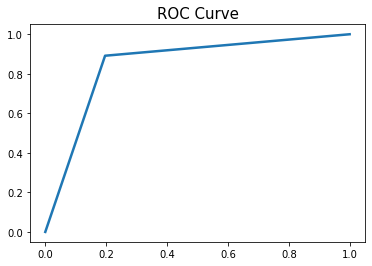

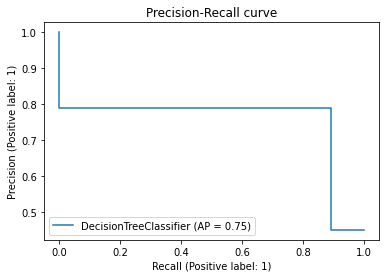

In [16]:
generate_evaluation_metrics(decTreeClf)

Metrics for Decision Tree Depth:  1

Accuracy:  0.8137254901960784

Precision and Recall Values
Average : Macro -  (0.8162734906037585, 0.8070652173913043, 0.8096080165045683, None)
Average : Micro -  (0.8137254901960784, 0.8137254901960784, 0.8137254901960784, None)
Average : Weighted -  (0.8149994903999185, 0.8137254901960784, 0.812352998965575, None)

Classificatio Report
              precision    recall  f1-score   support

         Low       0.80      0.88      0.84        56
        High       0.83      0.74      0.78        46

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.81      0.81      0.81       102


Confusion Matrix
[[49  7]
 [12 34]]




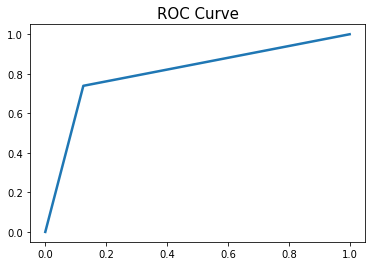

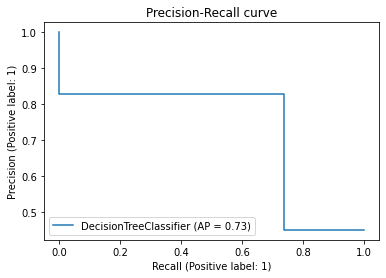

In [17]:
generate_evaluation_metrics(oneDepthDecTreeClf)

### Comparison

##### The Accuracy for the Decision Tree with a higher depth is higher than the one with the Decision Tree that has the depth of 1. This keeps on changing with the randomness associated with the prediction and the decision trees.

##### The ROC and Precision Curves of the 2 models are very similar with some deflection from each other.

##### The classification report of the 2 models show that the precision for "Low" of the 1st Model is higher than the 2nd Model and the precision for "High" of the 1st Model is lower than the 2nd Model. Because of thsi there is not a very significant difference between the 2 models' accuracy.
